In [17]:
import pandas as pd
import numpy as np
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
import matplotlib.pyplot as plt


In [40]:
elec_noise_freq=60
min_freq=30
# https://pmc.ncbi.nlm.nih.gov/articles/PMC3130311/ paper suggested these min and max cut offs
max_freq=1000
resample_rate=1000

In [44]:
datapath = r"E:\heart_rate_recording\20250107_164636_hear_rate_mouse1.rec\20250107_164636_hear_rate_mouse1.rec"
#se.read is the class function used to read in spikegadgets it requres file path and stream id = trodes for ephys ECU is used for medpc
recording = se.read_spikegadgets(datapath, stream_id = 'trodes')
print(recording)
# removes the noise from the reccording notch filter removes a given freq. 
recording = sp.notch_filter(recording, freq=elec_noise_freq)
# sets filter for a min and max cutoff
recording = sp.bandpass_filter(recording, freq_min=min_freq, freq_max=max_freq)
# resamples transforms data into sampling rates HZ
recording = sp.resample(recording, resample_rate=resample_rate)

SpikeGadgetsRecordingExtractor: 32 channels - 20.0kHz - 1 segments - 6,599,122 samples 
                                329.96s (5.50 minutes) - int16 dtype - 402.78 MiB
  file_path: E:\heart_rate_recording\20250107_164636_hear_rate_mouse1.rec\20250107_164636_hear_rate_mouse1.rec


In [42]:
# creates a numpy array of the time and channels 
#recoirding = class object that has the meta data and data 
#get_traces is the function that gets me just the data 
traces = recording.get_traces()

In [43]:
print(recording)

ResampleRecording: 32 channels - 1.0kHz - 1 segments - 329,956 samples - 329.96s (5.50 minutes) 
                   int16 dtype - 20.14 MiB


In [33]:
# time, channels
traces.shape

(6599, 32)

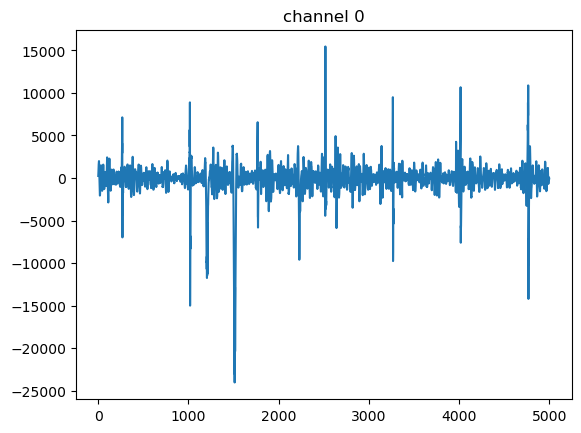

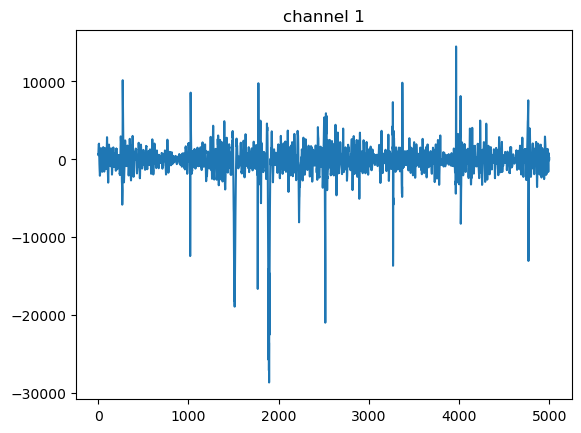

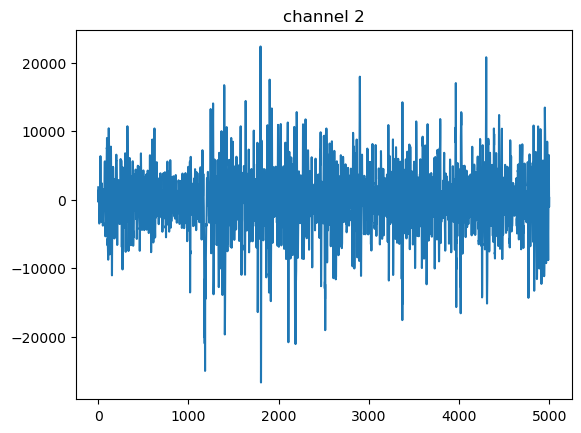

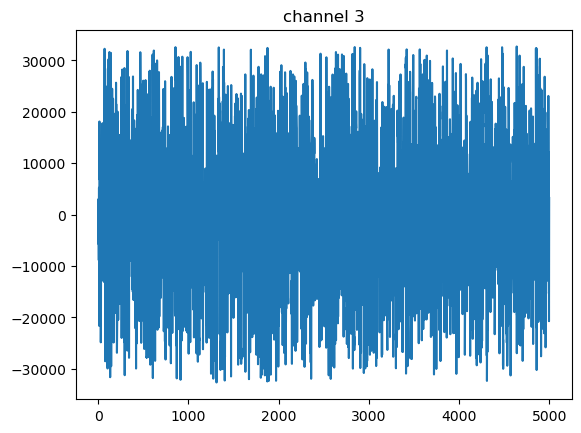

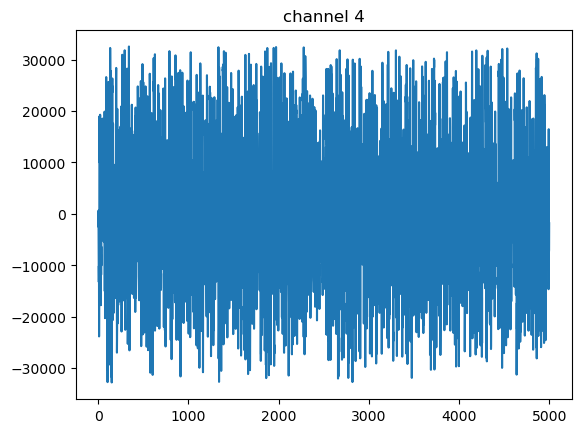

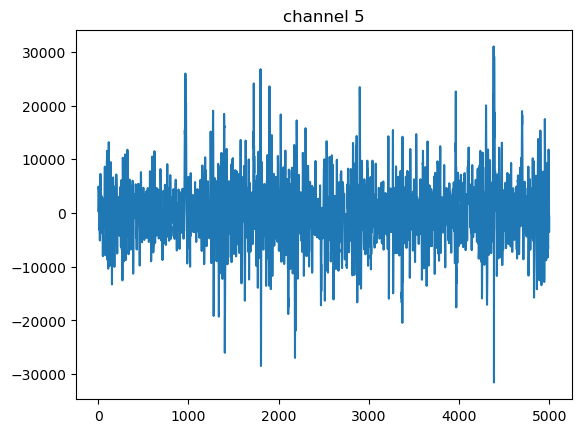

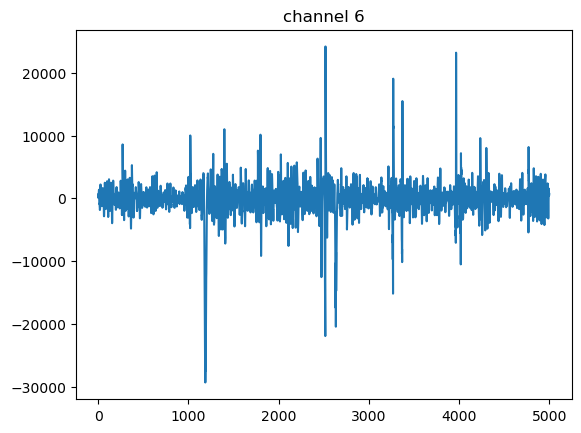

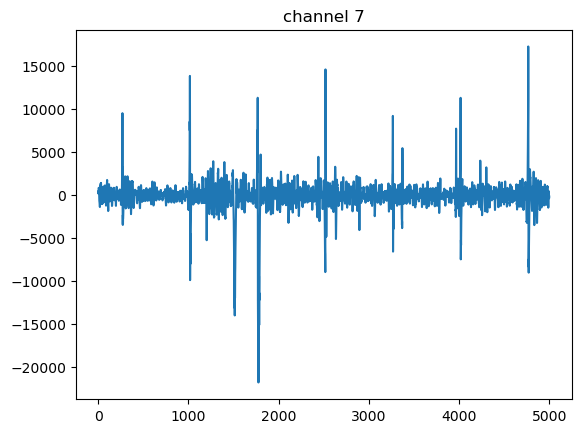

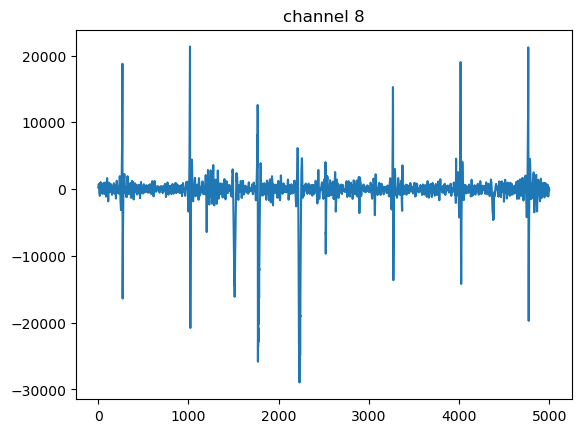

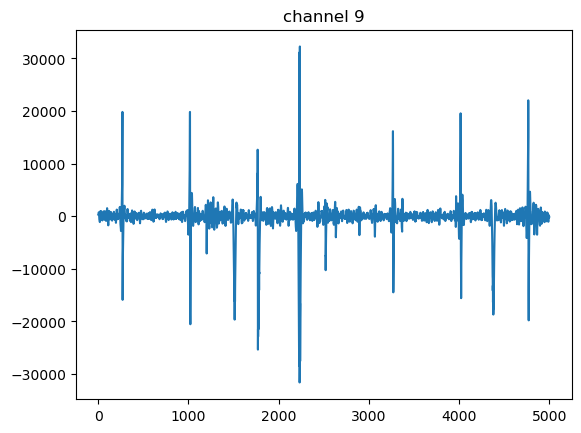

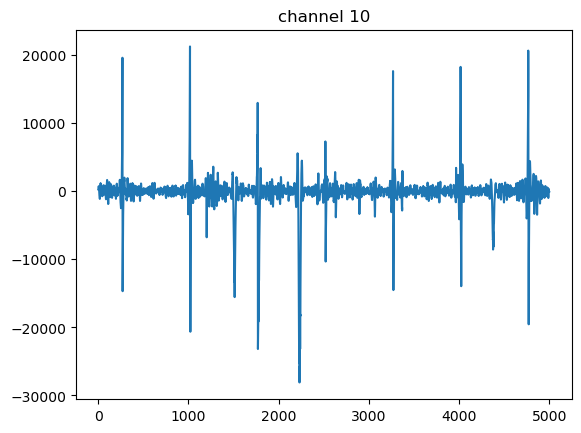

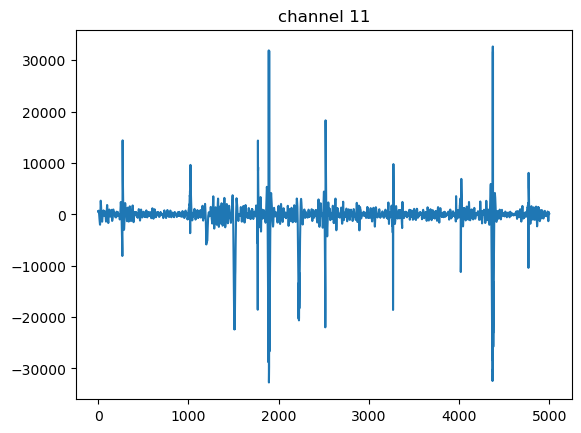

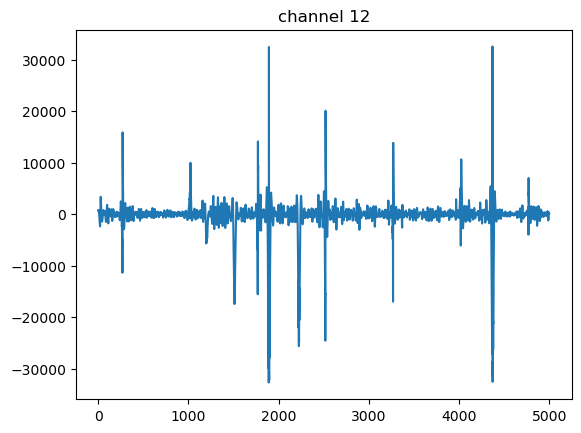

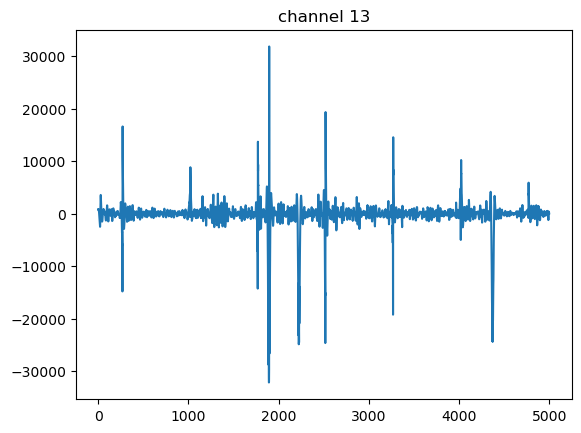

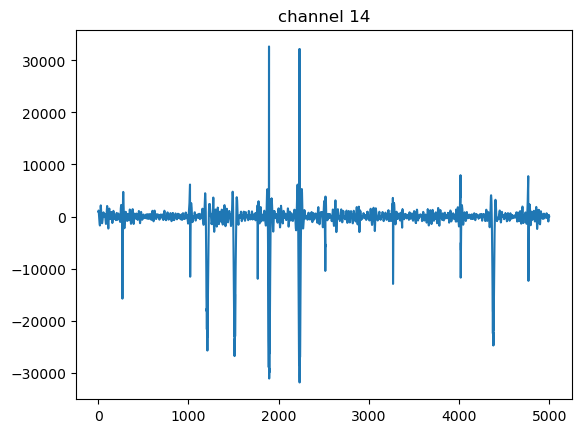

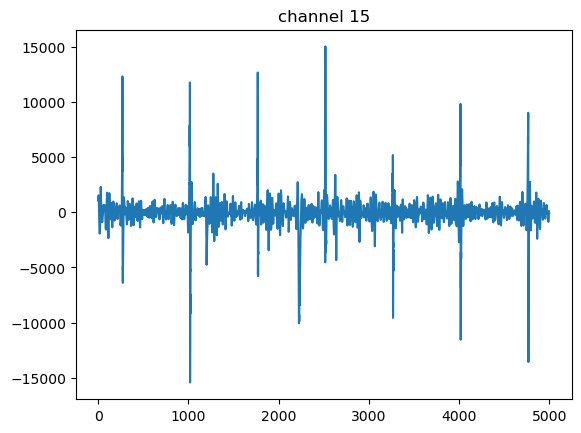

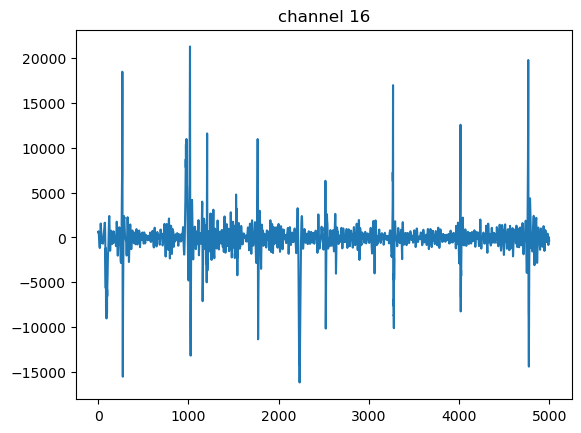

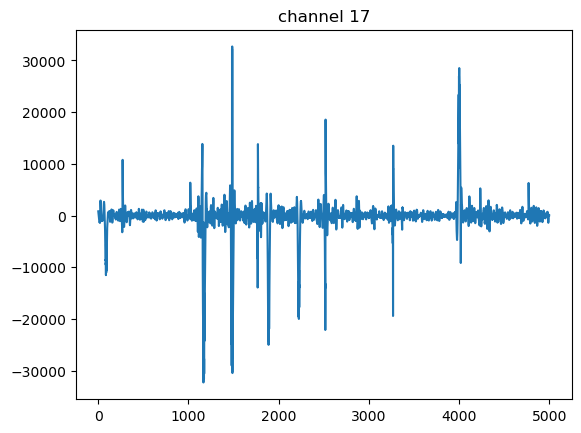

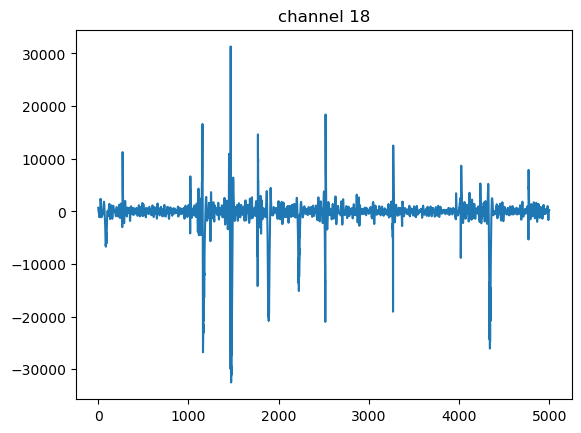

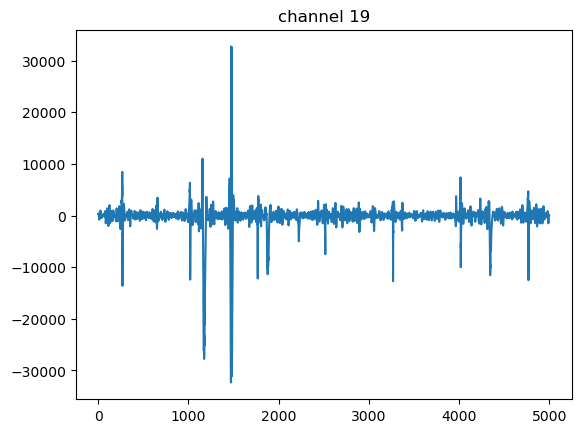

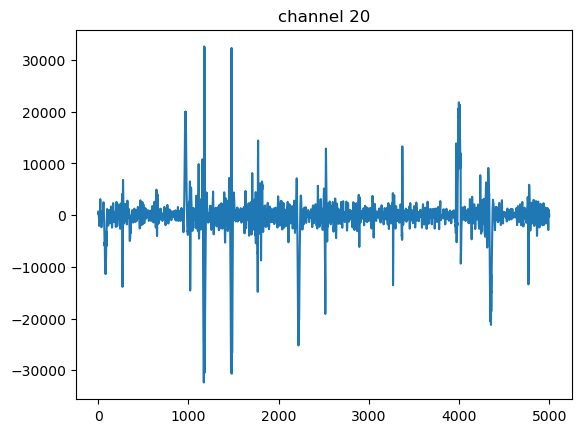

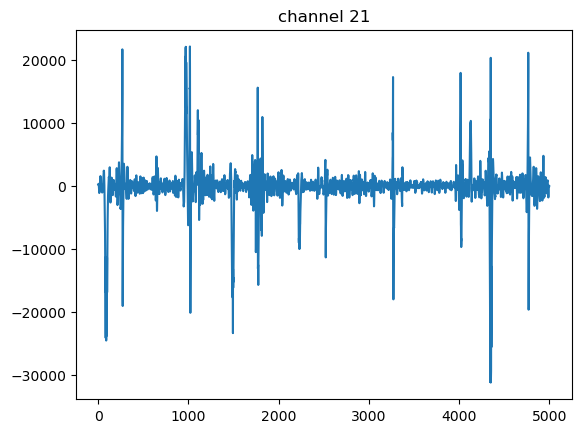

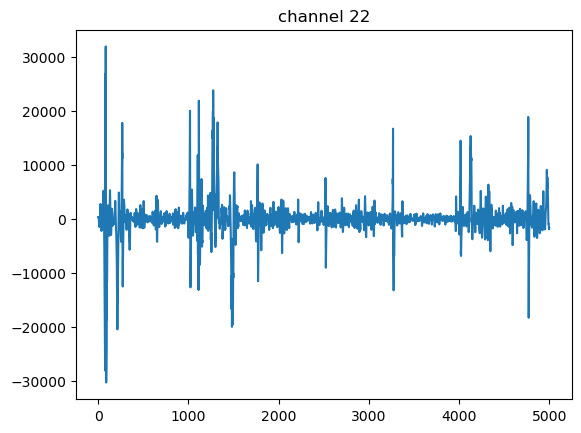

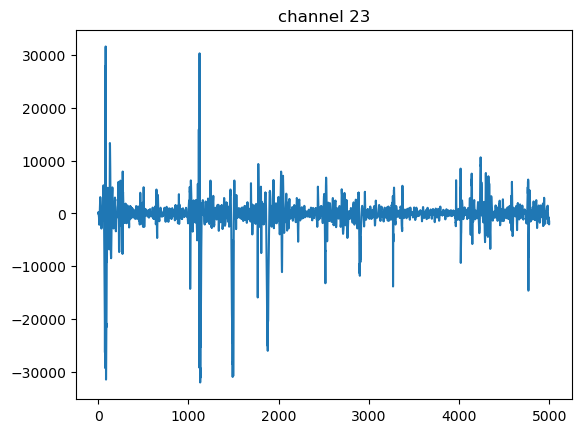

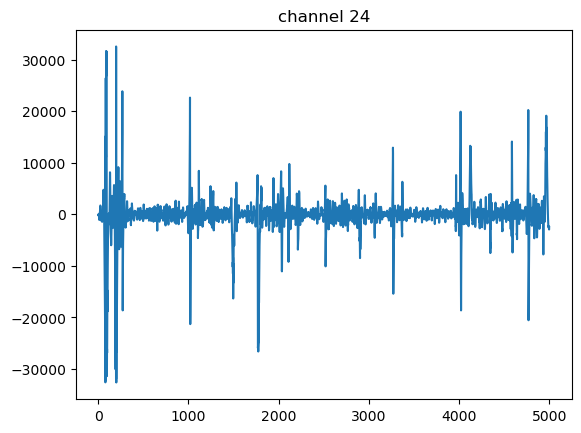

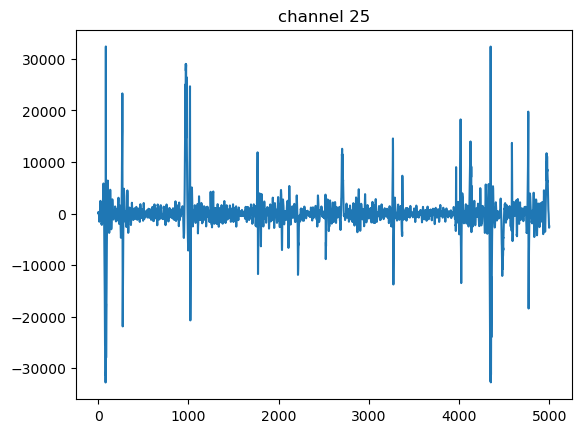

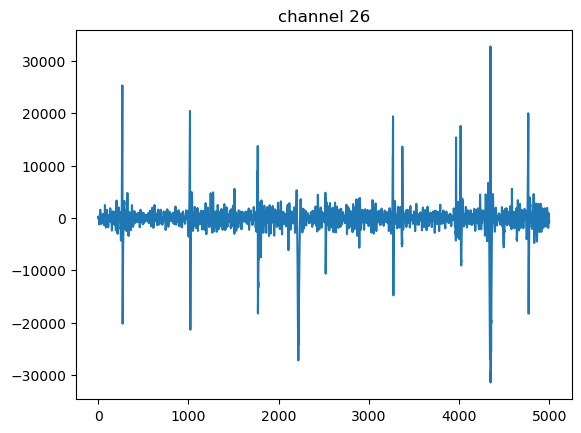

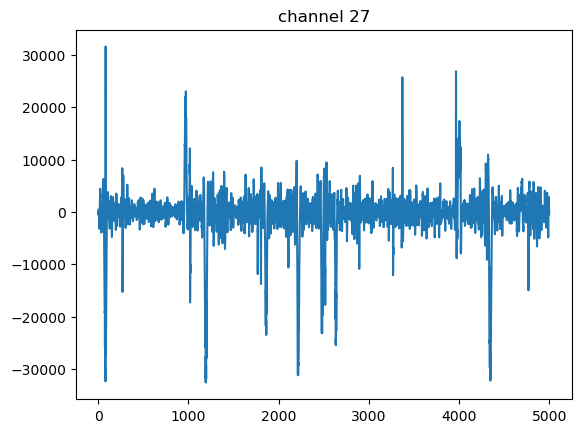

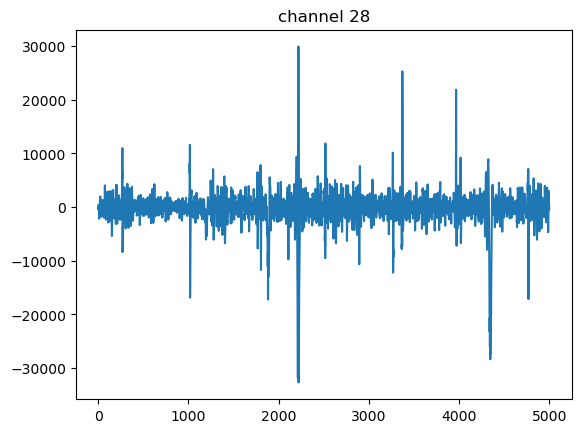

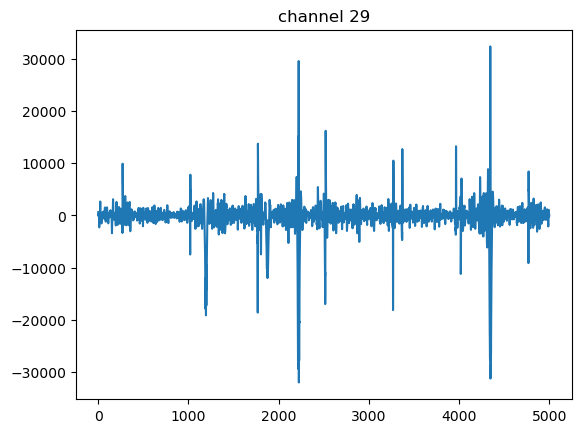

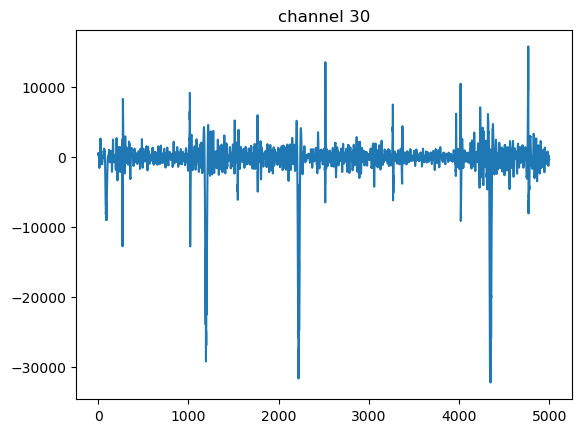

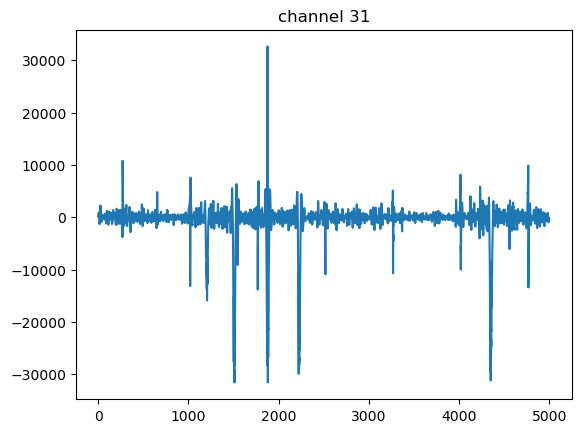

In [45]:
for i in range(32):    

    plt.plot(traces[5000:10000,i])
    plt.title(f'channel {i}')
    plt.show()